### Import the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and create the dataframe

In [2]:
path = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df = pd.read_csv(path)
df_copy = df.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Select features given in the assignment

In [3]:
features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity',]
df = df[features]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data preparation
<ul>
<li>Select only the features from above and fill in the missing values with 0.</li>
<li>Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.</li>
<li>Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.</li>
<li>Create a new column population_per_household by dividing the column population by the column households from dataframe.</li>
</ul>

In [4]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df=df.fillna(0)

In [7]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df['rooms_per_household'] = df.total_rooms.values / df.households.values  
df['bedrooms_per_room'] = df.total_bedrooms.values / df.total_rooms.values
df['population_per_household'] = df.population.values / df.households.values
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question-1

In [15]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Split the data
<ul>
<li>Split your data in train/val/test sets, with 60%/20%/20% distribution.</li>
<li>Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.</li>
<li>Make sure that the target value (median_house_value) is not in your dataframe.</li>
</ul>

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
len(df_full_train),len(df_test)

(16512, 4128)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [20]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [22]:
#Reset the row numbers of the training, validation and test dataframes.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [23]:
#define target variable in all datasets and remove them from the dataframes
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [26]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


### Question 2
<ul>
<li>Create the correlation matrix for the numerical features of your train dataset.</li>
<li>What are the two features that have the biggest correlation in this dataset?</li>
Options:
<ul>
<li>total_bedrooms and households</li>
<li>total_bedrooms and total_rooms</li>
<li>population and households</li>
<li>population_per_household and total_rooms</li>
</ul>    
</ul>   

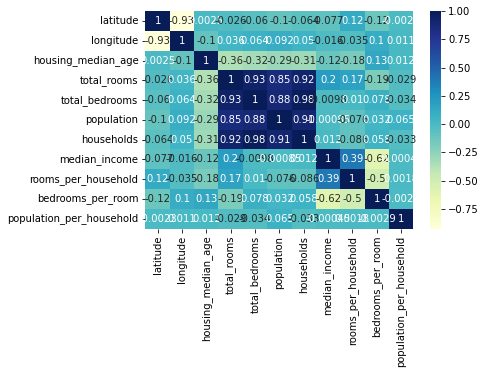

In [31]:
ax = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)

In [32]:
correlation_matrix = df_train.corr()
print(correlation_matrix)

                          latitude  longitude  housing_median_age  \
latitude                  1.000000  -0.925005            0.002477   
longitude                -0.925005   1.000000           -0.099812   
housing_median_age        0.002477  -0.099812            1.000000   
total_rooms              -0.025914   0.036449           -0.363522   
total_bedrooms           -0.059730   0.063840           -0.324156   
population               -0.100272   0.091670           -0.292476   
households               -0.063529   0.049762           -0.306119   
median_income            -0.076805  -0.016426           -0.119591   
rooms_per_household       0.119118  -0.034814           -0.181275   
bedrooms_per_room        -0.124507   0.102320            0.129456   
population_per_household -0.002301   0.011022            0.012167   

                          total_rooms  total_bedrooms  population  households  \
latitude                    -0.025914       -0.059730   -0.100272   -0.063529   
longitude

In [39]:
options=['total_bedrooms', 'households', 'total_rooms', 'population','population_per_household']
df_train_small = df_train[options]
correlation_matrix = df_train_small.corr()
print('The correlation of total_bedrooms and households is:', correlation_matrix.loc['total_bedrooms','households'])
print('The correlation of total_bedrooms and total_rooms is:', correlation_matrix.loc['total_bedrooms','total_rooms'])
print('The correlation of population and households is:', correlation_matrix.loc['population','households'])
print('The correlation of population_per_household and total_rooms is:', correlation_matrix.loc['population_per_household','total_rooms'])

The correlation of total_bedrooms and households is: 0.9793993527694163
The correlation of total_bedrooms and total_rooms is: 0.9315462999468395
The correlation of population and households is: 0.9068406743022618
The correlation of population_per_household and total_rooms is: -0.029451679411510792


### Make median_house_value binary
<ul>
<li>We need to turn the median_house_value variable from numeric into binary.</li>
<li>Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.</li>
</ul>

In [52]:
def binarize(y):
    result=[]
    mean_value = y.mean()
    for i in range(len(y)):
        if y[i] >= mean_value:
            result.append(1)
        else:
            result.append(0)
    return result

In [54]:
above_average_train = binarize(y_train)
above_average_val = binarize(y_val)
above_average_test = binarize(y_test)


### Question 3
<ul>
<li>Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.</li>
<li>What is the value of mutual information?</li>
<li>Round it to 2 decimal digits using round(score, 2)</li>
</ul>

In [55]:
from sklearn.metrics import mutual_info_score

In [57]:
round(mutual_info_score(df_train.ocean_proximity, above_average_train),2)

0.1

### Question 4
<ul>
<li>Now let's train a logistic regression</li>
<li>Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.</li>
<li>Fit the model on the training dataset.
  <ul>
<li>To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:</li>
<li>model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)</li>
  </ul>
<li>Calculate the accuracy on the validation dataset and round it to 2 decimal digits.</li>
</ul>

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [121]:
train_dicts = df_train.to_dict(orient='records')

In [122]:
dv = DictVectorizer(sparse=False)

In [123]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)


In [124]:
X_train.shape

(12384, 16)

In [67]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [126]:
model.fit(X_train,above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [127]:
val_dicts = df_val.to_dict(orient='records')
dvv = DictVectorizer(sparse=False)
dvv.fit(val_dicts)
X_val = dvv.transform(val_dicts)

In [128]:
y_pred = model.predict_proba(X_val)[:,1]

In [129]:
decision = (y_pred >= 0.5)

In [130]:
all_features=round((decision == above_average_val).mean(),2)
print(all_features)

0.84


### Question 5
<ul>
<li>Let's find the least useful feature using the feature elimination technique.</li>
<li>Train a model with all these features (using the same parameters as in Q4).</li>
<li>Now exclude each feature from this set and train a model without it. Record the accuracy for each model.</li>
<li>For each feature, calculate the difference between the original accuracy and the accuracy without the feature.</li>
<li>Which of following feature has the smallest difference?
    <ul>
    <li>total_rooms</li>
    <li>total_bedrooms</li>
    <li>population</li>
    <li>households</li>
    </ul>
</ul>

In [75]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [96]:
def prepare_X_data(df):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(dicts)
    result = dv.transform(dicts)
    return result

    

In [132]:
columns = list(df_train.columns)
minimum_score_difference=1000
for col in columns:
    df_new_train = df_train.copy()
    df_new_train.drop(col, inplace=True, axis=1)
    df_new_val = df_val.copy()
    df_new_val.drop(col, inplace=True, axis=1)
    X_train = prepare_X_data(df_new_train)
    X_val = prepare_X_data(df_new_val)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,above_average_train)
    y_pred = model.predict_proba(X_val)[:,1]
    decision = (y_pred >= 0.5)
    score = (decision == above_average_val).mean()
    score_difference = abs(score - all_features)
    print('The accuracy when feature '+col+' is eliminated, the accuracy difference is:', score_difference)
    if score_difference < minimum_score_difference:
        minimum_score_difference = score_difference
        feature = col
print('')
print('When '+ feature +' is eliminated the minimum score difference is obtained and it is:', minimum_score_difference)
    

    

The accuracy when feature latitude is eliminated, the accuracy difference is: 0.005697674418604581
The accuracy when feature longitude is eliminated, the accuracy difference is: 0.007393410852713167
The accuracy when feature housing_median_age is eliminated, the accuracy difference is: 0.010058139534883659
The accuracy when feature total_rooms is eliminated, the accuracy difference is: 0.002306201550387521
The accuracy when feature total_bedrooms is eliminated, the accuracy difference is: 0.004001937984496107
The accuracy when feature population is eliminated, the accuracy difference is: 0.012480620155038702
The accuracy when feature households is eliminated, the accuracy difference is: 0.0054554263565891326
The accuracy when feature median_income is eliminated, the accuracy difference is: 0.052936046511627866
The accuracy when feature ocean_proximity is eliminated, the accuracy difference is: 0.019263565891472822
The accuracy when feature rooms_per_household is eliminated, the accurac

### Question 6
<ul>
<li>For this question, we'll see how to use a linear regression model from Scikit-Learn</li>
<li>We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.</li>
<li>Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.</li>
<li>This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]</li>
<li>Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.</li>
</ul>
If there are multiple options, select the smallest alpha.

In [135]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)


In [140]:
X_train=prepare_X_data(df_train)
X_train.shape


(12384, 16)

In [141]:
from sklearn.linear_model import Ridge

In [142]:
model = Ridge(alpha=0, solver="sag", random_state=42)

In [143]:
model.fit(X_train,y_train_log)

Ridge(alpha=0, random_state=42, solver='sag')

In [144]:
X_val=prepare_X_data(df_val)
X_val.shape

(4128, 16)

In [145]:
y_pred = model.predict(X_val)

In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
mean_squared_error(y_val_log, y_pred)

0.27464262613642076

In [150]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,y_train_log)
    y_pred = model.predict(X_val)
    rmse_score = mean_squared_error(y_val_log, y_pred)
    print(a,round(rmse_score,3))

0 0.275
0.01 0.275
0.1 0.275
1 0.275
10 0.275
